In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [3]:
#Data Loading
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
#Exploring shapes
print(f"The shape of the trainset is : {X_train.shape}")
print(f"The shape of the testset is : {X_test.shape}")

The shape of the trainset is : (60000, 28, 28)
The shape of the testset is : (10000, 28, 28)


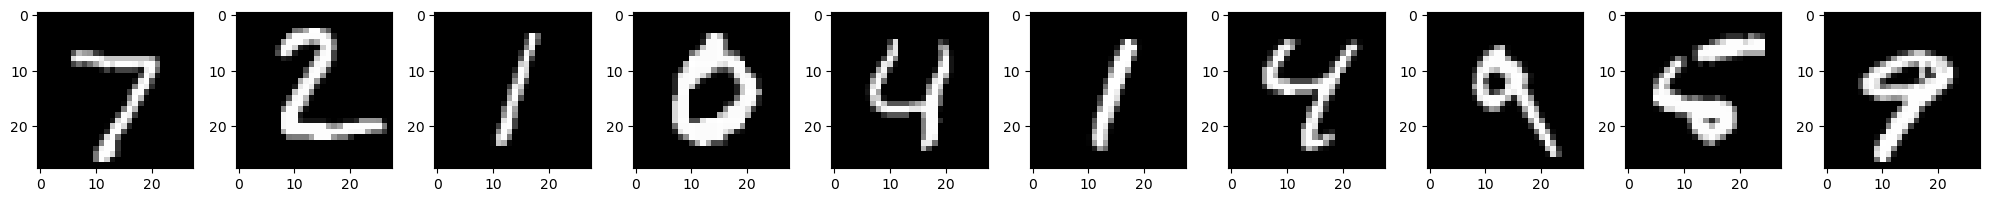

In [18]:
#Exploring Dataset
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_test[i],cmap='gray')   

plt.tight_layout()
plt.show()

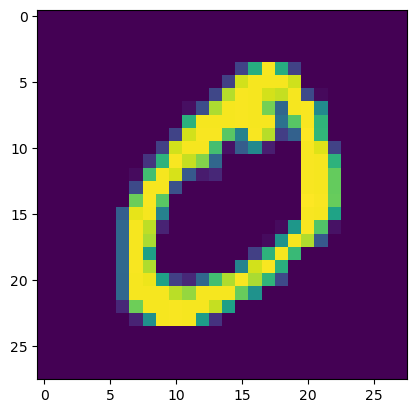

In [20]:
#Normalizing Train and test set
X_train=X_train/255
X_test=X_test/255
plt.imshow(X_train[1])

In [5]:
#Creating the architecture of the model
model = tf.keras.models.Sequential()
#First Convolution Layer
model.add(tf.keras.layers.Convolution2D(
    input_shape=(28, 28,1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation="relu",
))
#First MaxPooling Layer
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
#Second Convolution Layer
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation="relu",
))
#Second MaxPooling Layer
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
#Flatten Layer
model.add(tf.keras.layers.Flatten())
#Dense Layer
model.add(tf.keras.layers.Dense(
    units=128,
    activation="relu"
));
#Dropout
model.add(tf.keras.layers.Dropout(0.2))
#Outout Layer
model.add(tf.keras.layers.Dense(
    units=10,
    activation="sigmoid",
))

In [7]:
#Training model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2177 - accuracy: 0.9335
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0723 - accuracy: 0.9776
Epoch 3/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0528 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0412 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0334 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0213 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 75s 40m

In [8]:
#Evaluation of the model on test set
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0326 - accuracy: 0.9910


[0.032571397721767426, 0.9909999966621399]

313/313 [==============================] - 1s 2ms/step
6 1.0


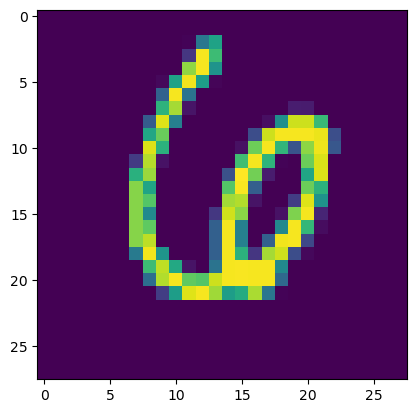

In [17]:
#Some Predictions
plt.imshow(X_test[66])
y_predicted=model.predict(X_test)
print(np.argmax(y_predicted[66]),np.max(y_predicted[66]))

In [10]:
#Geting the predicted number
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [11]:
#Creating the confusion Matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    1,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1132,    0,    2,    0,    0,    0,    1,    0,    0],
       [   1,    0, 1024,    0,    0,    0,    1,    5,    1,    0],
       [   0,    0,    1, 1000,    0,    6,    0,    1,    2,    0],
       [   0,    0,    1,    0,  977,    0,    1,    0,    0,    3],
       [   0,    0,    0,    6,    0,  883,    2,    1,    0,    0],
       [   3,    3,    0,    1,    1,    1,  948,    0,    1,    0],
       [   0,    2,    4,    0,    0,    0,    0, 1019,    1,    2],
       [   3,    0,    1,    1,    0,    1,    0,    1,  966,    1],
       [   1,    1,    1,    1,    6,    4,    1,    6,    3,  985]])>

Text(95.72222222222221, 0.5, 'Truth')

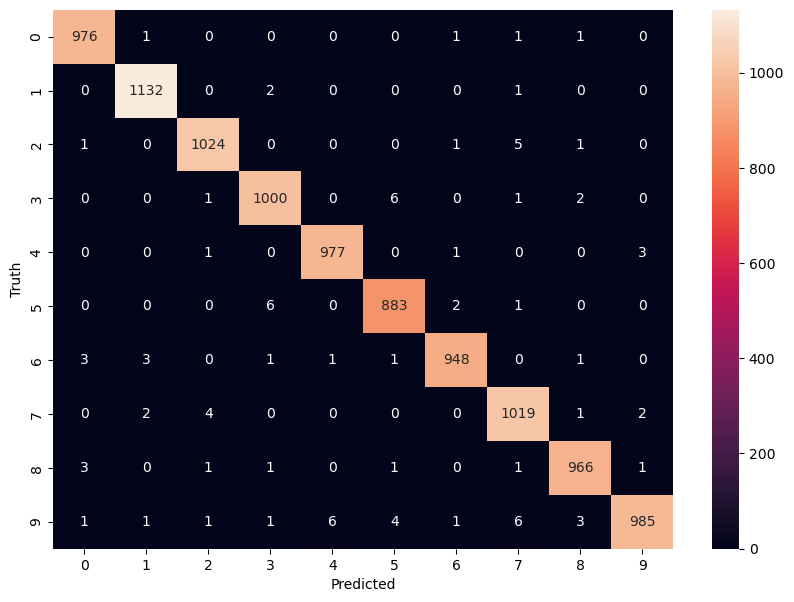

In [12]:
#Ploting the Confusion matrix
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
#Saving the Model
model.save("MNIST_CNN.h5")